# <span style="color:darkblue"> Lecture 9 Exercises </span>

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [1]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```



In [24]:
# Write your own code

df = pd.read_csv("data_raw/exchangerates.csv")
df["date_string"] = pd.to_datetime(df["date_string"])
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11021 entries, 0 to 11020
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_string  11021 non-null  datetime64[ns]
 1   usd_to_rmb   10543 non-null  float64       
 2   usd_to_jpy   10604 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 258.4 KB
None
  date_string  usd_to_rmb  usd_to_jpy
0  1981-01-02      1.5341      202.50
1  1981-01-05      1.5418      199.05
2  1981-01-06      1.5264      199.70
3  1981-01-07      1.5264      201.05
4  1981-01-08      1.5264      201.70


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"



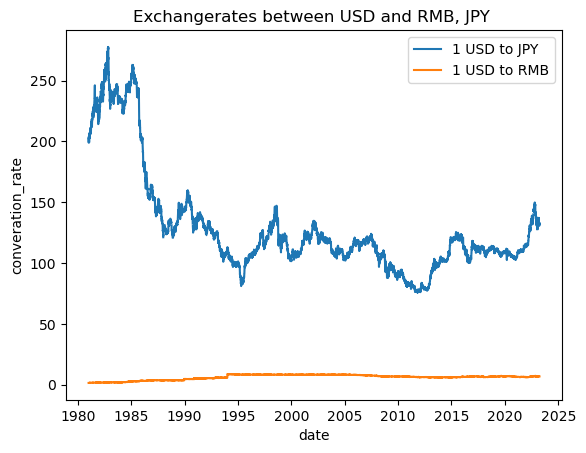

In [23]:
# Write your own code

plt.plot(df["date_string"], df['usd_to_jpy'], df["date_string"],df['usd_to_rmb'])
plt.ylabel("converation_rate")
plt.xlabel("date")
plt.title('Exchangerates between USD and RMB, JPY ')
plt.legend(["1 USD to JPY", "1 USD to RMB"])
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Plotting the exchange rates for USD to JPY and USD to RMB
plt.plot(df["date_string"], df['usd_to_jpy'], label="1 USD to JPY")
plt.plot(df["date_string"], df['usd_to_rmb'], label="1 USD to RMB")

# Adding labels, title, and legend
plt.ylabel("Conversion Rate")
plt.xlabel("Date")
plt.title("Exchange Rates Between USD and JPY, RMB")
plt.legend()

# Display the plot
plt.show()

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_rmb" which computes the percentage daily <br>
growth rate of "usd_to_rmb".



In [29]:
# Function to compute the daily percentage growth rate
def function_growth_rate(usd_to_rmb):
    growth_rate = usd_to_rmb.pct_change()  # Use pandas' pct_change() method
    return growth_rate

# Calculate the growth rate for 'usd_to_rmb' and assign it to a new column 'growth_rmb'
df["growth_rmb"] = function_growth_rate(df["usd_to_rmb"])

print(df.head())  # Display the first few rows to check the result

  date_string  usd_to_rmb  usd_to_jpy  growth_rmb
0  1981-01-02      1.5341      202.50         NaN
1  1981-01-05      1.5418      199.05    0.005019
2  1981-01-06      1.5264      199.70   -0.009988
3  1981-01-07      1.5264      201.05    0.000000
4  1981-01-08      1.5264      201.70    0.000000


/var/folders/t1/8k_t8b7j4nbbhz47zswhlb7m0000gn/T/ipykernel_70772/2865107052.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = usd_to_rmb.pct_change()  # Use pandas' pct_change() method


In [27]:
# Write your own code

# Function to compute growth rate between two consecutive elements
def function_growth_rate(i):
    if i == 0:  # No growth rate for the first element
        return None
    else:
        return (df["usd_to_rmb"][i] - df["usd_to_rmb"][i-1]) / df["usd_to_rmb"][i-1]

# Apply the function using map() and convert the result to a list
df["growth_rmb"] = list(map(function_growth_rate, range(len(df["usd_to_rmb"]))))

print(df.head())  # Show the first few rows to verify the result


  date_string  usd_to_rmb  usd_to_jpy  growth_rmb
0  1981-01-02      1.5341      202.50         NaN
1  1981-01-05      1.5418      199.05    0.005019
2  1981-01-06      1.5264      199.70   -0.009988
3  1981-01-07      1.5264      201.05    0.000000
4  1981-01-08      1.5264      201.70    0.000000


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_rmb" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_rmb" series, label the axes and the title
- Use the command ```plt.fill_between()``` to create a shaded region <br>
for time periods where "bool_cond" is true.



In [5]:
# Write your own code





<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [6]:
# Write your own code



<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset


In [7]:
# Write your own code




